Gen #0 Best Fitness = 0.0
Gen #1 Best Fitness = 0.6014897324533787
Gen #2 Best Fitness = 0.6490569887477051
Gen #3 Best Fitness = 0.6763944005630259
Gen #4 Best Fitness = 0.7009562680856546
Gen #5 Best Fitness = 0.7472191437988656
Gen #6 Best Fitness = 0.7711900609324003
Gen #7 Best Fitness = 0.7837003210980902
Gen #8 Best Fitness = 0.7873774420582795
Gen #9 Best Fitness = 0.8070631473308255
Gen #10 Best Fitness = 0.8205674555827936
Gen #11 Best Fitness = 0.8205674555827936
Gen #12 Best Fitness = 0.830191587016438
Gen #13 Best Fitness = 0.830191587016438
Gen #14 Best Fitness = 0.8473649623843089
Gen #15 Best Fitness = 0.8473649623843089
Gen #16 Best Fitness = 0.8473649623843089
Gen #17 Best Fitness = 0.8473649623843089
Gen #18 Best Fitness = 0.8586666578771927
Gen #19 Best Fitness = 0.8586666578771927
Gen #20 Best Fitness = 0.8586666578771927
Gen #21 Best Fitness = 0.8723896818828183
Gen #22 Best Fitness = 0.8811503152567356
Gen #23 Best Fitness = 0.8811503152567356
Gen #24 Best Fitnes

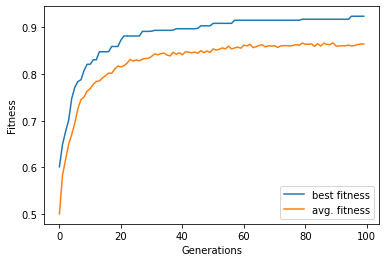

In [1]:
'''
Demo of EvolSearch
evolving for 10 dim vectors with each element in [0,1], maximizing their means
i.e. best solution is [1,1,1,1,1,1,1,1,1,1]
'''

import numpy as np
import matplotlib.pyplot as plt
from stochsearch import EvolSearch

def fitness_function(individual):
    '''
    sample fitness function
    '''
    return np.mean(individual)

# defining the parameters for the evolutionary search
evol_params = {
    'num_processes' : 4, # (optional) number of proccesses for multiprocessing.Pool
    'pop_size' : 100,    # population size
    'genotype_size': 50, # dimensionality of solution
    'fitness_function': fitness_function, # custom function defined to evaluate fitness of a solution
    'elitist_fraction': 0.04, # fraction of population retained as is between generations
    'mutation_variance': 0.2 # mutation noise added to offspring.
}

# create evolutionary search object
es = EvolSearch(evol_params)

'''OPTION 1
# execute the search for 100 generations
num_gens = 100
es.execute_search(num_gens)
'''

'''OPTION 2'''
# keep searching till a stopping condition is reached
best_fit = []
mean_fit = []
num_gen = 0
max_num_gens = 100
desired_fitness = 0.98
#while es.get_best_individual_fitness() < desired_fitness and num_gen < max_num_gens:
while num_gen < max_num_gens:
    print('Gen #'+str(num_gen)+' Best Fitness = '+str(es.get_best_individual_fitness()))
    es.step_generation()
    best_fit.append(es.get_best_individual_fitness())
    mean_fit.append(es.get_mean_fitness())
    num_gen += 1

# print results
print('Max fitness of population = ',es.get_best_individual_fitness())
print('Best individual in population = ',es.get_best_individual())

# plot results
plt.figure()
plt.plot(best_fit)
plt.plot(mean_fit)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.legend(['best fitness', 'avg. fitness'])
plt.show()

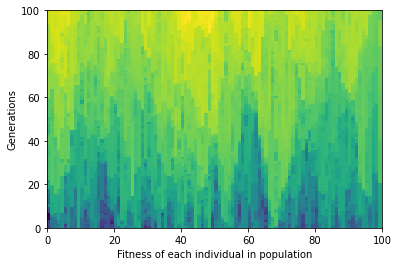

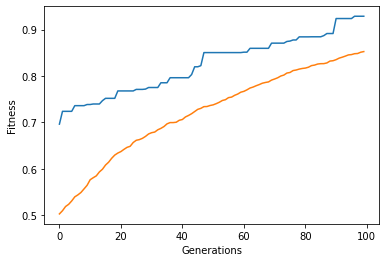

In [2]:
'''
Demo of MicrobialSearch
evolving for 10 dim vectors with each element in [0,1], maximizing their means
i.e. best solution is [1,1,1,1,1,1,1,1,1,1]
'''

import numpy as np
from stochsearch import MicrobialSearch
import matplotlib.pyplot as plt

def fitness_function(individual):
    '''
    sample fitness function
    '''
    return np.mean(individual)

# defining the parameters for the evolutionary search
evol_params = {
    'num_processes' : 12, # (optional) number of proccesses for multiprocessing.Pool
    'pop_size' : 100,    # population size
    'genotype_size': 10, # dimensionality of solution
    'fitness_function': fitness_function, # custom function defined to evaluate fitness of a solution
    'recomb_prob': 0.1, # fraction of population retained as is between generations
    'mutation_variance': 0.01, # mutation noise added to offspring.
}

# create evolutionary search object
ms = MicrobialSearch(evol_params)

'''OPTION 1'''
# execute the search for 100 generations
num_gens = 100
hist = np.zeros((100,100))
best = []
avg = []

for i in range(num_gens):
    ms.step_generation()
    hist[i,:] = ms.get_fitnesses()
    best.append(ms.get_best_individual_fitness())
    avg.append(ms.get_mean_fitness())

plt.pcolormesh(np.asarray(hist))
plt.xlabel('Fitness of each individual in population')
plt.ylabel('Generations')
plt.show()
plt.plot(best,label='Best')
plt.plot(avg,label='Average')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

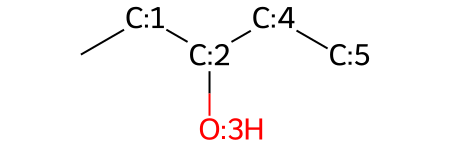

In [48]:
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem.Draw import IPythonConsole
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol = Chem.MolFromSmiles('CCC(O)CC')
# mol = Chem.AddHs(mol)
mol_with_atom_index(mol)


In [49]:
Lipinski.NumRotatableBonds(mol)

2

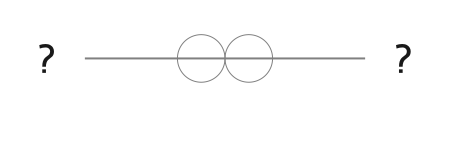

In [50]:
# '[!$(*#*)&!D1]-&!@[!$(*#*)&!D1]'
Lipinski.RotatableBondSmarts


In [51]:
ratable_bonds = mol.GetSubstructMatches(Lipinski.RotatableBondSmarts)

for rb in ratable_bonds:
    
    neighbor_idxs = list(rb)
    for neighbor in mol.GetAtoms()[rb[0]].GetNeighbors():
        if neighbor.GetIdx() not in neighbor_idxs:
            neighbor_idxs.insert(0, neighbor.GetIdx())
            break

    for neighbor in mol.GetAtoms()[rb[1]].GetNeighbors():
        if neighbor.GetIdx() not in neighbor_idxs:
            neighbor_idxs.append(neighbor.GetIdx())
            break

    print(neighbor_idxs, rb)


[0, 1, 2, 3] (1, 2)
[1, 2, 4, 5] (2, 4)


In [52]:
#   * GetBondLength(conf, iAtomId, jAtomId) (only in this case, atoms need
#     not be covalently bonded)
#   * SetBondLength(conf, iAtomId, jAtomId, value)
#   * GetAngleRad(conf, iAtomId, jAtomId, kAtomId)
#   * SetAngleRad(conf, iAtomId, jAtomId, kAtomId, value)
#   * GetAngleDeg(conf, iAtomId, jAtomId, kAtomId)
#   * SetAngleDeg(conf, iAtomId, jAtomId, kAtomId, value)
#   * GetDihedralRad(conf, iAtomId, jAtomId, kAtomId, lAtomId)
#   * SetDihedralRad(conf, iAtomId, jAtomId, kAtomId, lAtomId, value)
#   * GetDihedralDeg(conf, iAtomId, jAtomId, kAtomId, lAtomId)
#   * SetDihedralDeg(conf, iAtomId, jAtomId, kAtomId, lAtomId, value)